In [2]:
import pandas as pd
df=pd.read_csv(r"C:\Users\polpi\Desktop\data science\assignments\Timeseries\exchange_rate.csv", parse_dates=['date'], dayfirst=True)
df

,date,Ex_rate
0,1990-01-01,0.785500
1,1990-01-02,0.781800
2,1990-01-03,0.786700
3,1990-01-04,0.786000
4,1990-01-05,0.784900
...,...,...
7583,2010-10-06,0.718494
7584,2010-10-07,0.721839
7585,2010-10-08,0.723197
7586,2010-10-09,0.720825


In [3]:
df.set_index('date', inplace=True)
df

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


In [5]:
df.isnull().sum()

Ex_rate    0
dtype: int64

In [6]:
df.columns

Index(['Ex_rate'], dtype='object')

In [7]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


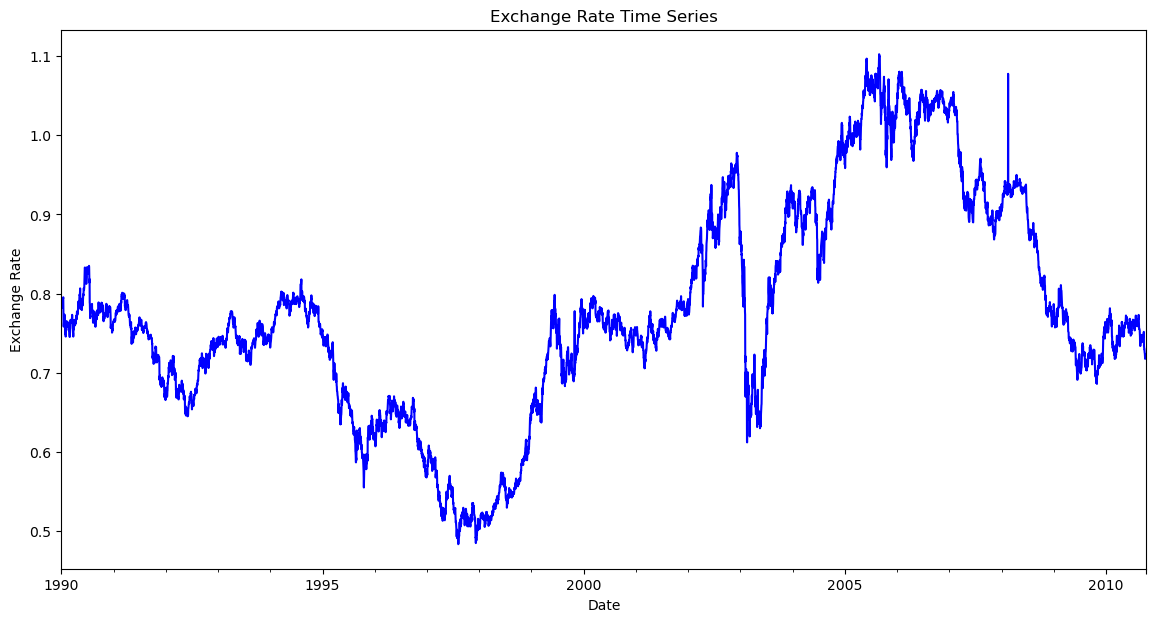

In [8]:
import matplotlib.pyplot as plt
df['Ex_rate'].plot(figsize=(14, 7), title='Exchange Rate Time Series', color='blue')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

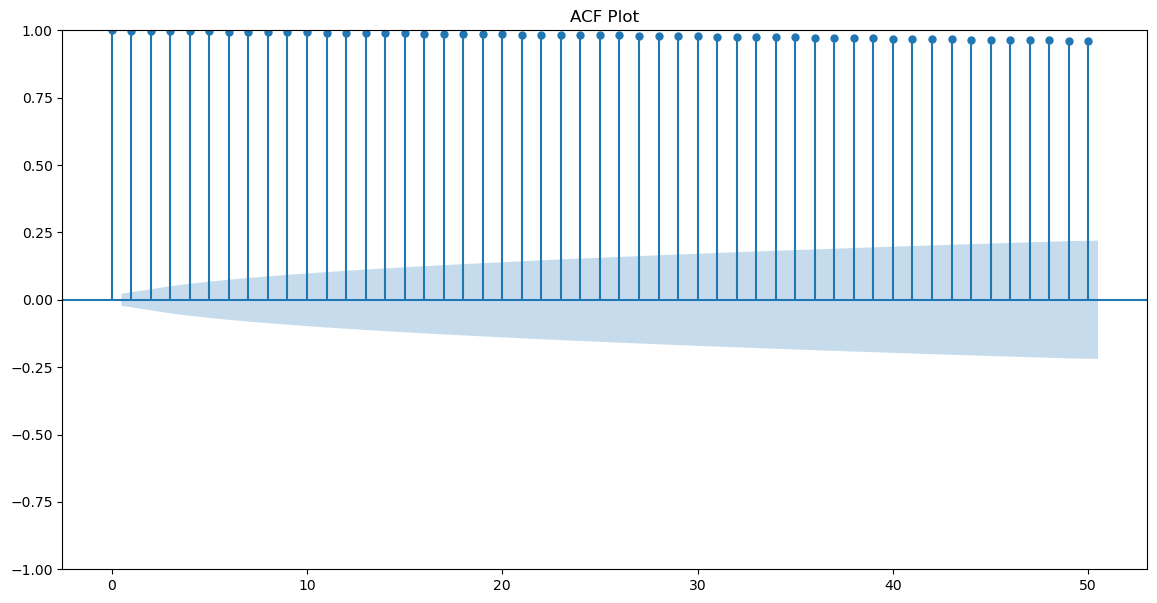

In [12]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plt.figure(figsize=(14,7))
plot_acf(df['Ex_rate'],lags=50,ax=plt.gca())
plt.title('ACF Plot')
plt.show()

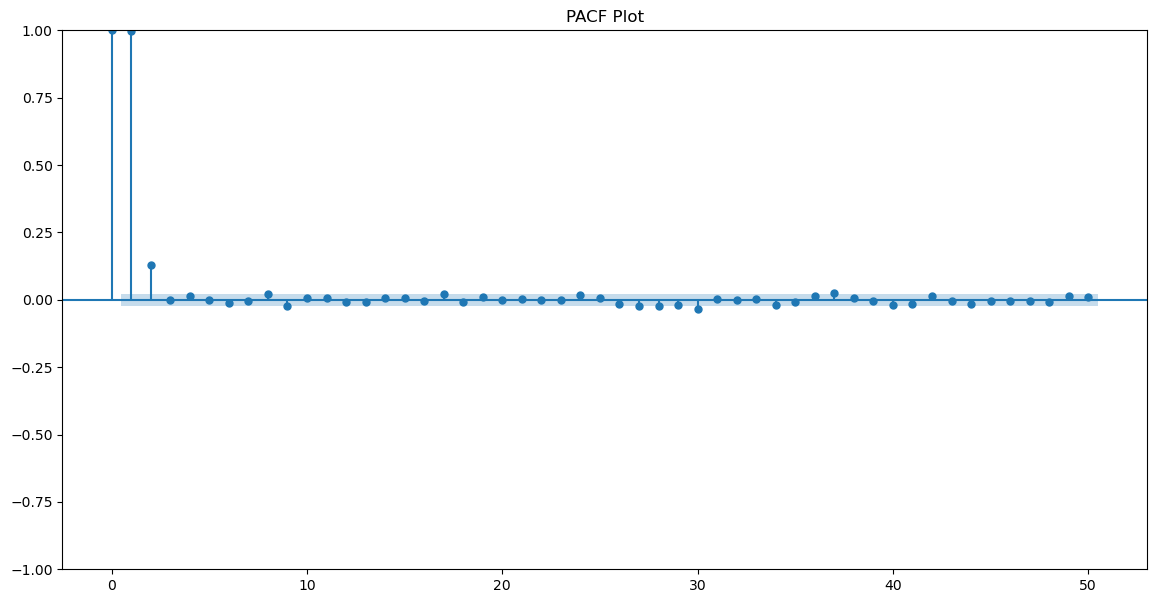

In [16]:
plt.figure(figsize=(14,7))
plot_pacf(df['Ex_rate'], lags=50, ax=plt.gca(), method='ywm')
plt.title('PACF Plot')
plt.show()

In [17]:
# Let us check whether our time series is stationary- required for ARIMA modeling
from statsmodels.tsa.stattools import adfuller
result = adfuller(df)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] <= 0.05:
    print("The time series is stationary (reject the null hypothesis).")
else:
    print("The time series is not stationary (fail to reject the null hypothesis).")

ADF Statistic: -1.664994180738078
p-value: 0.44923273535982894
Critical Values: {'1%': -3.4312123140180137, '5%': -2.861921078147796, '10%': -2.5669728434336108}
The time series is not stationary (fail to reject the null hypothesis).


In [18]:
diff_series = df.diff().dropna()
result_diff = adfuller(diff_series)
print('ADF Statistic (differenced):', result_diff[0])
print('p-value (differenced):', result_diff[1])

ADF Statistic (differenced): -99.39343120118623
p-value (differenced): 0.0


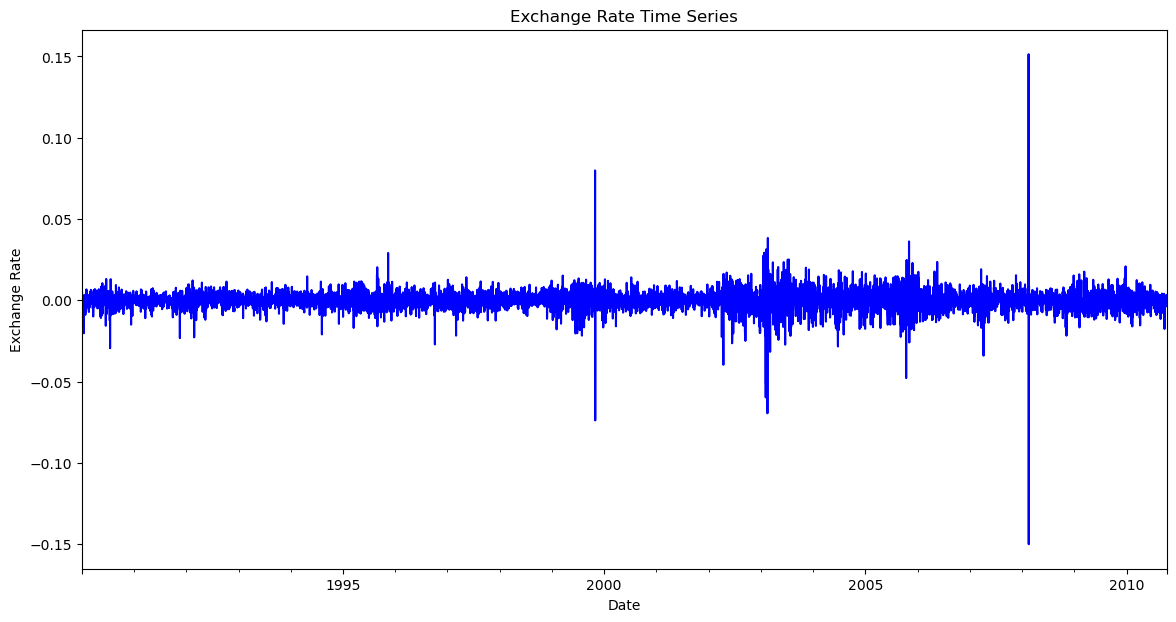

In [21]:
diff_series['Ex_rate'].plot(figsize=(14, 7), title='Exchange Rate Time Series', color='blue')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

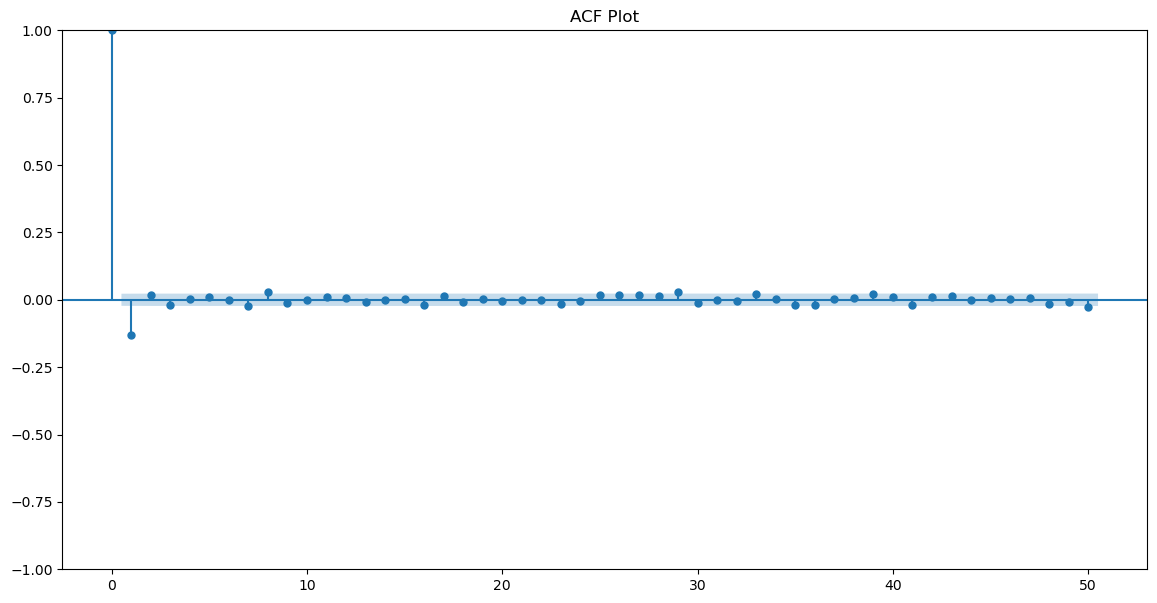

In [22]:
plt.figure(figsize=(14,7))
plot_acf(diff_series['Ex_rate'],lags=50,ax=plt.gca())
plt.title('ACF Plot')
plt.show()

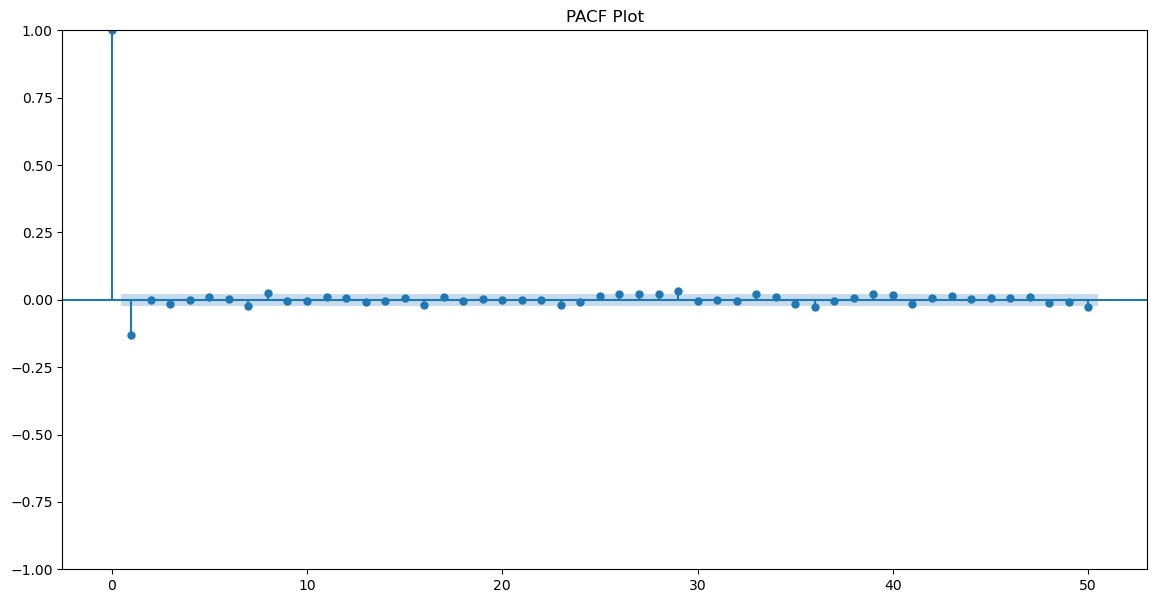

In [23]:
plt.figure(figsize=(14,7))
plot_pacf(diff_series['Ex_rate'], lags=50, ax=plt.gca(), method='ywm')
plt.title('PACF Plot')
plt.show()

In [138]:
from statsmodels.tsa.arima.model import ARIMA
p,d,q = 3,1,3 #determined using PACF,differencing and ACF graph respectively
model = ARIMA(diff_series['Ex_rate'], order=(p, d, q), trend='t')
model_fit = model.fit()
print(model_fit.summary())

C:\Users\polpi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7587
Model:                 ARIMA(3, 1, 3)   Log Likelihood               27840.698
Date:                Fri, 15 Nov 2024   AIC                         -55665.396
Time:                        12:21:30   BIC                         -55609.923
Sample:                    01-02-1990   HQIC                        -55646.358
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -4.854e-06   7.02e-06     -0.692      0.489   -1.86e-05     8.9e-06
ar.L1         -0.9088      0.103     -8.795      0.000      -1.111      -0.706
ar.L2         -0.9788      0.117     -8.344      0.0

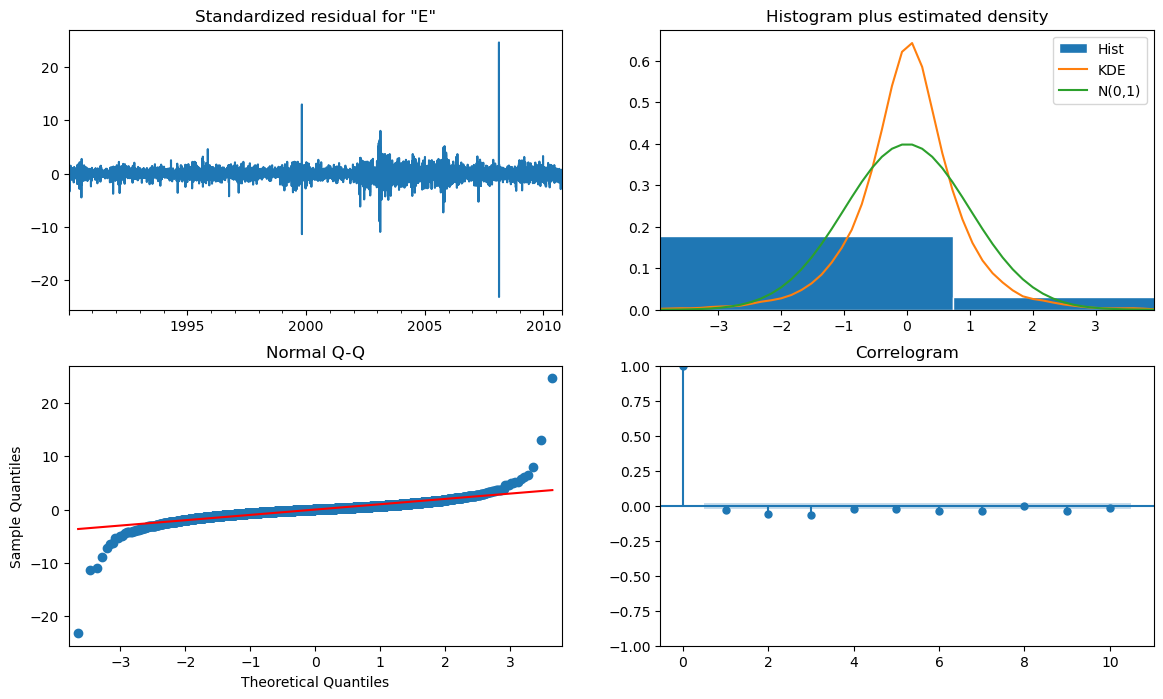

In [139]:
model_fit.plot_diagnostics(figsize=(14, 8))
plt.show()

In [140]:
forecast_steps = 30  # Number of steps to forecast
forecast_arima = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='D')[1:]
forecast_mean = forecast_arima.predicted_mean
forecast_ci = forecast_arima.conf_int()

In [141]:
last_observed_value = df['Ex_rate'].iloc[-1] 

forecast_original = [last_observed_value + forecast_mean[0]]
for i in range(1, len(forecast_mean)):
    forecast_original.append(forecast_original[i-1] + forecast_mean[i])

forecast_original = pd.Series(forecast_original, index=pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D'))

print(forecast_original)

2010-10-11    0.720149
2010-10-12    0.719506
2010-10-13    0.719043
2010-10-14    0.718450
2010-10-15    0.717780
2010-10-16    0.717271
2010-10-17    0.716693
2010-10-18    0.716015
2010-10-19    0.715461
2010-10-20    0.714886
2010-10-21    0.714206
2010-10-22    0.713613
2010-10-23    0.713031
2010-10-24    0.712352
2010-10-25    0.711725
2010-10-26    0.711130
2010-10-27    0.710452
2010-10-28    0.709797
2010-10-29    0.709184
2010-10-30    0.708506
2010-10-31    0.707829
2010-11-01    0.707195
2010-11-02    0.706514
2010-11-03    0.705819
2010-11-04    0.705163
2010-11-05    0.704476
2010-11-06    0.703766
2010-11-07    0.703088
2010-11-08    0.702392
2010-11-09    0.701669
Freq: D, dtype: float64


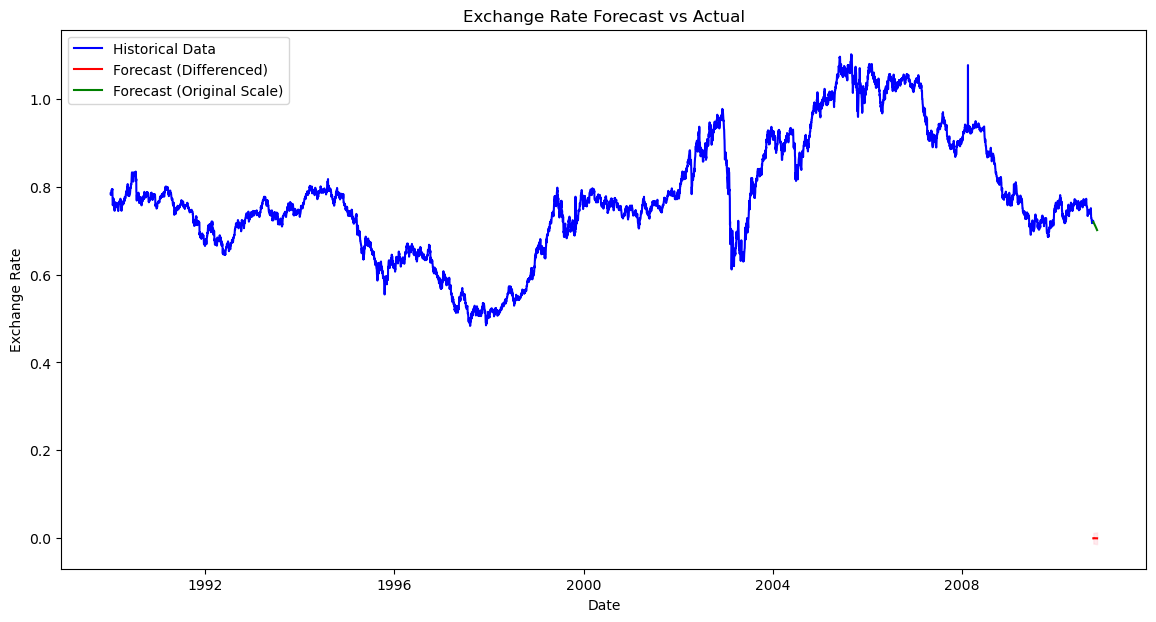

In [142]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Ex_rate'], label='Historical Data', color='blue')
plt.plot(forecast_index, forecast_mean, label='Forecast (Differenced)', color='red')
plt.plot(forecast_index, forecast_original, label='Forecast (Original Scale)', color='green')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rate Forecast vs Actual')
plt.legend()
plt.show()

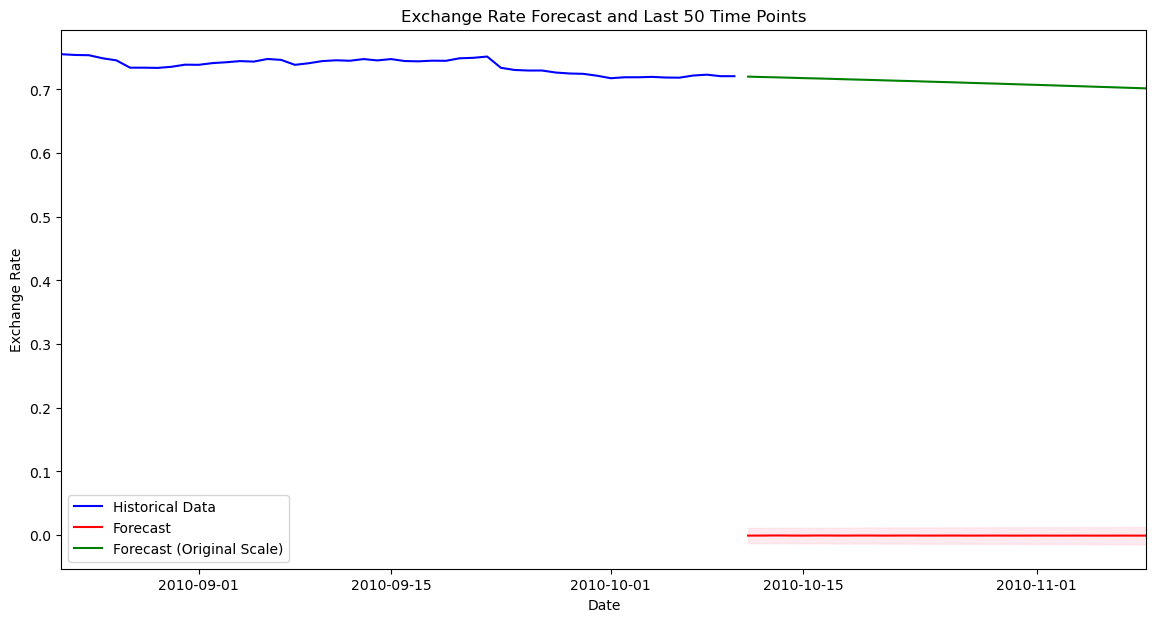

In [125]:
# let us plot the last 50 time series values and the predicted values

plt.figure(figsize=(14, 7))
plt.plot(df.index[-50:], df['Ex_rate'][-50:], label='Historical Data', color='blue')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.plot(forecast_index, forecast_original, label='Forecast (Original Scale)', color='green')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.xlim([df.index[-50], forecast_index[-1]])
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rate Forecast and Last 50 Time Points')
plt.legend()
plt.show()

In [143]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(df['Ex_rate'], trend='add',seasonal='add',seasonal_periods=12) 
model_fit = model.fit()
print(f"AIC for the fitted model: {model_fit.aic}")

C:\Users\polpi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


AIC for the fitted model: -77624.57256398602


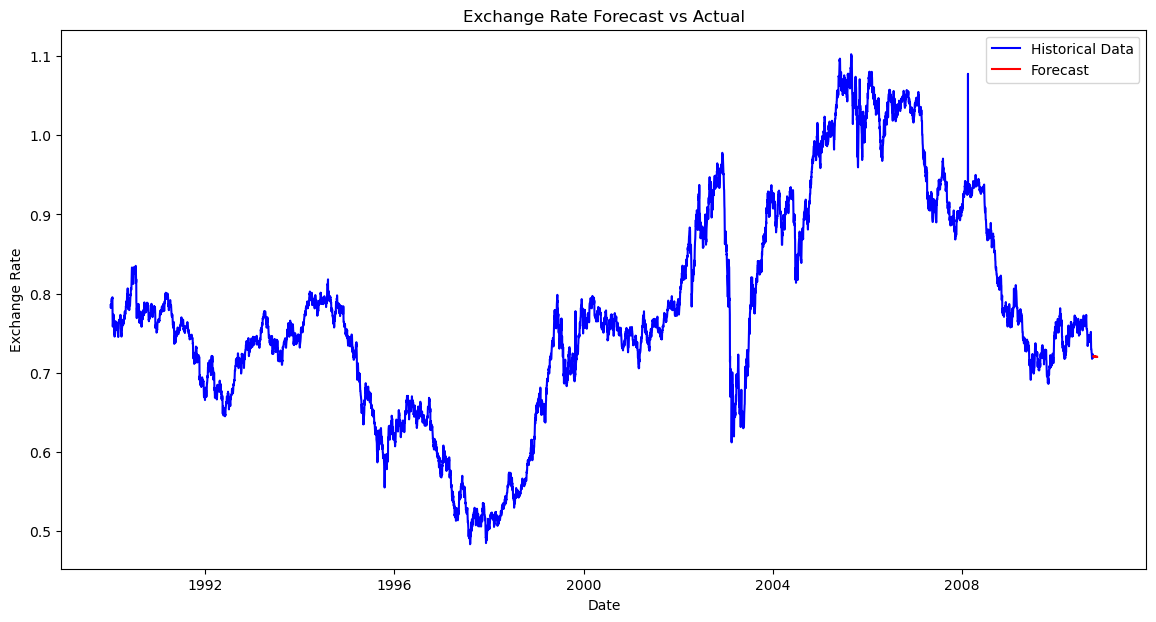

In [144]:
forecast_steps = 30
forecast_exp = model_fit.forecast(forecast_steps)

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Ex_rate'], label='Historical Data', color='blue')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast_exp, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rate Forecast vs Actual')
plt.legend()
plt.show()

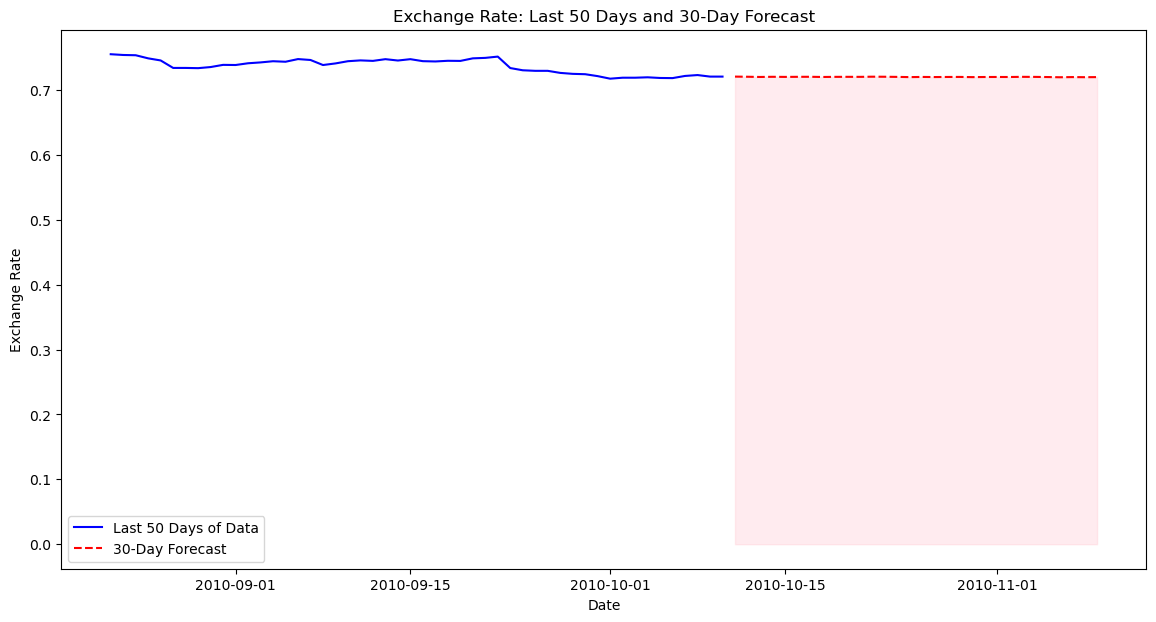

In [128]:
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='D')[1:]
last_50_days = df.tail(50)
forecast_data = pd.Series(forecast_exp, index=forecast_index, name='Forecast')
combined_data = pd.concat([last_50_days['Ex_rate'], forecast_data])

plt.figure(figsize=(14, 7))
plt.plot(last_50_days.index, last_50_days['Ex_rate'], label='Last 50 Days of Data', color='blue')
plt.plot(forecast_index, forecast_exp, label='30-Day Forecast', color='red', linestyle='dashed')
plt.fill_between(forecast_index, forecast_exp, color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rate: Last 50 Days and 30-Day Forecast')
plt.legend()
plt.show()

In [148]:
print("ARIMA forecast:", forecast_original)
print("Exponential Smoothing forecast:", forecast_exp)
forecast_original.shape, forecast_exp.shape

ARIMA forecast: 2010-10-11    0.720149
2010-10-12    0.719506
2010-10-13    0.719043
2010-10-14    0.718450
2010-10-15    0.717780
2010-10-16    0.717271
2010-10-17    0.716693
2010-10-18    0.716015
2010-10-19    0.715461
2010-10-20    0.714886
2010-10-21    0.714206
2010-10-22    0.713613
2010-10-23    0.713031
2010-10-24    0.712352
2010-10-25    0.711725
2010-10-26    0.711130
2010-10-27    0.710452
2010-10-28    0.709797
2010-10-29    0.709184
2010-10-30    0.708506
2010-10-31    0.707829
2010-11-01    0.707195
2010-11-02    0.706514
2010-11-03    0.705819
2010-11-04    0.705163
2010-11-05    0.704476
2010-11-06    0.703766
2010-11-07    0.703088
2010-11-08    0.702392
2010-11-09    0.701669
Freq: D, dtype: float64
Exponential Smoothing forecast: 2010-10-11    0.720812
2010-10-12    0.720594
2010-10-13    0.720258
2010-10-14    0.720517
2010-10-15    0.720355
2010-10-16    0.720477
2010-10-17    0.720537
2010-10-18    0.720241
2010-10-19    0.720422
2010-10-20    0.720463
2010-10-

((30,), (30,))

In [149]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

arima_mae = mean_absolute_error(forecast_exp, forecast_original)
arima_rmse = np.sqrt(mean_squared_error(forecast_exp, forecast_original))
arima_mape = np.mean(np.abs((forecast_exp - forecast_original) / forecast_exp)) * 100

print("ARIMA Model Error Metrics:")
print(f"MAE: {arima_mae}")
print(f"RMSE: {arima_rmse}")
print(f"MAPE: {arima_mape}%")

ARIMA Model Error Metrics:
MAE: 0.009070188361799188
RMSE: 0.010532390664190093
MAPE: 1.25936930474071%


In [154]:
print("the ARIMA model differ from the Exponential Smoothing forecasts by 0.0091")
print("The RMSE is also pretty small indicating that ARIMA model has not deviated a lot from the Exponential smoothening model.")
print("This suggests that, on average, the ARIMA model's forecasts deviate by about 1.26% from the Exponential Smoothing forecasts. \nIt's a relatively small error, indicating a good fit between the two models")
print("")
print("Both the ARIMA model and the EXP smoothening model suggests that the trend is going downwards for the next 30 days.")

the ARIMA model differ from the Exponential Smoothing forecasts by 0.0091
The RMSE is also pretty small indicating that ARIMA model has not deviated a lot from the Exponential smoothening model.
This suggests that, on average, the ARIMA model's forecasts deviate by about 1.26% from the Exponential Smoothing forecasts. 
It's a relatively small error, indicating a good fit between the two models

Both the ARIMA model and the EXP smoothening model suggests that the trend is going downwards for the next 30 days.
